In [32]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from pylab import *
import math
import copy
import tensorflow as tf

ImportError: No module named 'tensorflow'

In [ ]:
img1 = cv2.imread('car1.jpg', 0)

ROI1 = img1[760:887, 1022:1289]

cv2.imshow('img1', img1)
cv2.imshow('ROI1', ROI1)

cv2.waitKey(0)
cv2.destroyAllWindows()

cv2.imwrite('ROI1.png', ROI1)

In [ ]:
img1.shape

In [ ]:
def imshow(image):      
    cv2.imshow('image', image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    return

In [ ]:
imshow(ROI1)

In [ ]:
kernel = np.ones((5, 5),np.uint8)

In [ ]:
def erosion(image):
    calculate_erosion = cv2.erode(image, kernel, iterations = 1)
    return calculate_erosion;

plt.subplot(121),plt.imshow(ROI1,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(erosion(ROI1),cmap = 'gray')
plt.title('After applying Erosion operation'), plt.xticks([]), plt.yticks([])
plt.show()

#cv2.imshow('original', ROI1)
#cv2.imshow('erosion', erosion(ROI1))
#cv2.waitKey(0)
#cv2.destroyAllWindows()

# Saving images
cv2.imwrite('ROI1_erosion.png', erosion(ROI1))

In [ ]:
def dilation(image):
    #calculate_dilation = cv2.dilate(image, kernel, iterations = 1)
    calculate_dilation = cv2.dilate(erosion(image), kernel, iterations = 1) 
    return calculate_dilation;

plt.subplot(121),plt.imshow(ROI1,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dilation(ROI1),cmap = 'gray')
plt.title('After applying Dilation operation'), plt.xticks([]), plt.yticks([])
plt.show()

#cv2.imshow('original', ROI2)
#cv2.imshow('dilation', dilation(ROI2))
#cv2.waitKey(0)
#cv2.destroyAllWindows()

# Saving images
cv2.imwrite('ROI1_dilation.png', dilation(ROI1))

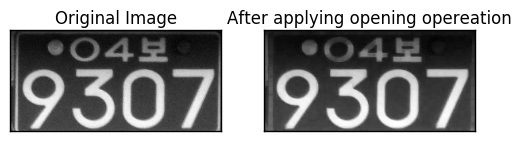

True

In [25]:
def opening(image):
    calculate_opening = cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)
    return calculate_opening;

plt.subplot(121),plt.imshow(ROI1,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(opening(ROI1),cmap = 'gray')
plt.title('After applying opening opereation'), plt.xticks([]), plt.yticks([])
plt.show()

#cv2.imshow('original', ROI1)
#cv2.imshow('opening', opening(ROI1))
#cv2.waitKey(0)
#cv2.destroyAllWindows()

# Saving images
cv2.imwrite('ROI1_opening.png', opening(ROI1))

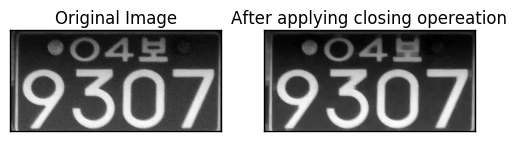

True

In [26]:
def closing(image):
    calculate_closing = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)
    return calculate_closing;

plt.subplot(121),plt.imshow(ROI1,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(closing(ROI1),cmap = 'gray')
plt.title('After applying closing opereation'), plt.xticks([]), plt.yticks([])
plt.show()

#cv2.imshow('original', ROI1)
#cv2.imshow('closing', closing(ROI1))
#cv2.waitKey(0)
#cv2.destroyAllWindows()

# Saving images
cv2.imwrite('ROI1_closing.png', closing(ROI1))

In [27]:
def get_car_number(name):
    car1 =  cv2.imread(name)
    print(car1.shape[0],car1.shape[1])
    left = car1.shape[1]
    top = car1.shape[0]
    bottom = 0
    right = 0
    for i in range(int(car1.shape[0]/5),int(car1.shape[0]/5*4)):
        for j in range(int(car1.shape[1]/5),int(car1.shape[1]/5*4)):
            if car1[i,j,1]/2*3 > car1[i,j,0]*2 and car1[i,j,1]/2*3 > car1[i,j,2]*2 :
                if left > j:
                    left = j
                if right < j :
                    right = j
                if top > i :
                    top = i;
                if bottom < i :
                    bottom = i            

    print(left, top, bottom, right)

    crop = np.zeros((bottom-top,right-left,3), 'uint8')
    for i in range(0,crop.shape[0]):
        for j in range(0,crop.shape[1]):
            if car1[i+top,j+left,1]/2*3 > car1[i+top,j+left,0]*2 and car1[i+top,j+left,1]/2*3 > car1[i+top,j+left,2]*2 :
                crop[i,j,0] = 255
                crop[i,j,1] = 255
                crop[i,j,2] = 255
            else :
                crop[i,j,0] = 0
                crop[i,j,1] = 0
                crop[i,j,2] = 0
    
    return crop
      
def gray_crop(image):
    kernel = np.ones((3,3),np.uint8)
    erodes = cv2.erode(image,kernel,iterations = 10)
    left = image.shape[0]
    top = image.shape[1]
    bottom = 0
    right = 0
    for i in range(0,int(erodes.shape[0])):
        for j in range(0,int(erodes.shape[1])):
            if erodes[i,j,0] == 255 :
                if left > j:
                    left = j
                if right < j :
                    right = j
                if top > i :
                    top = i;
                if bottom < i :
                    bottom = i            

    print(left, top, bottom, right)
    top = top-20
    left = left-20
    if left < 0 :
        left = 0
    
    if top < 0 :
        top = 0
    
    crop = np.zeros((bottom-top,right-left,3), 'uint8')
    for i in range(0,crop.shape[1]):
        for j in range(0,crop.shape[0]):
            if image[j+top,i+left,0] > 0 :
                crop[j,i,0] = 255
                crop[j,i,1] = 255
                crop[j,i,2] = 255
            else :
                crop[j,i,0] = 0
                crop[j,i,1] = 0
                crop[j,i,2] = 0
                
    return crop

In [28]:
car1 =  "car1.jpg"
crop1 = get_car_number(car1) 

1536 2048
409 307 1227 1637


In [29]:
print(crop1.shape)

(920, 1228, 3)


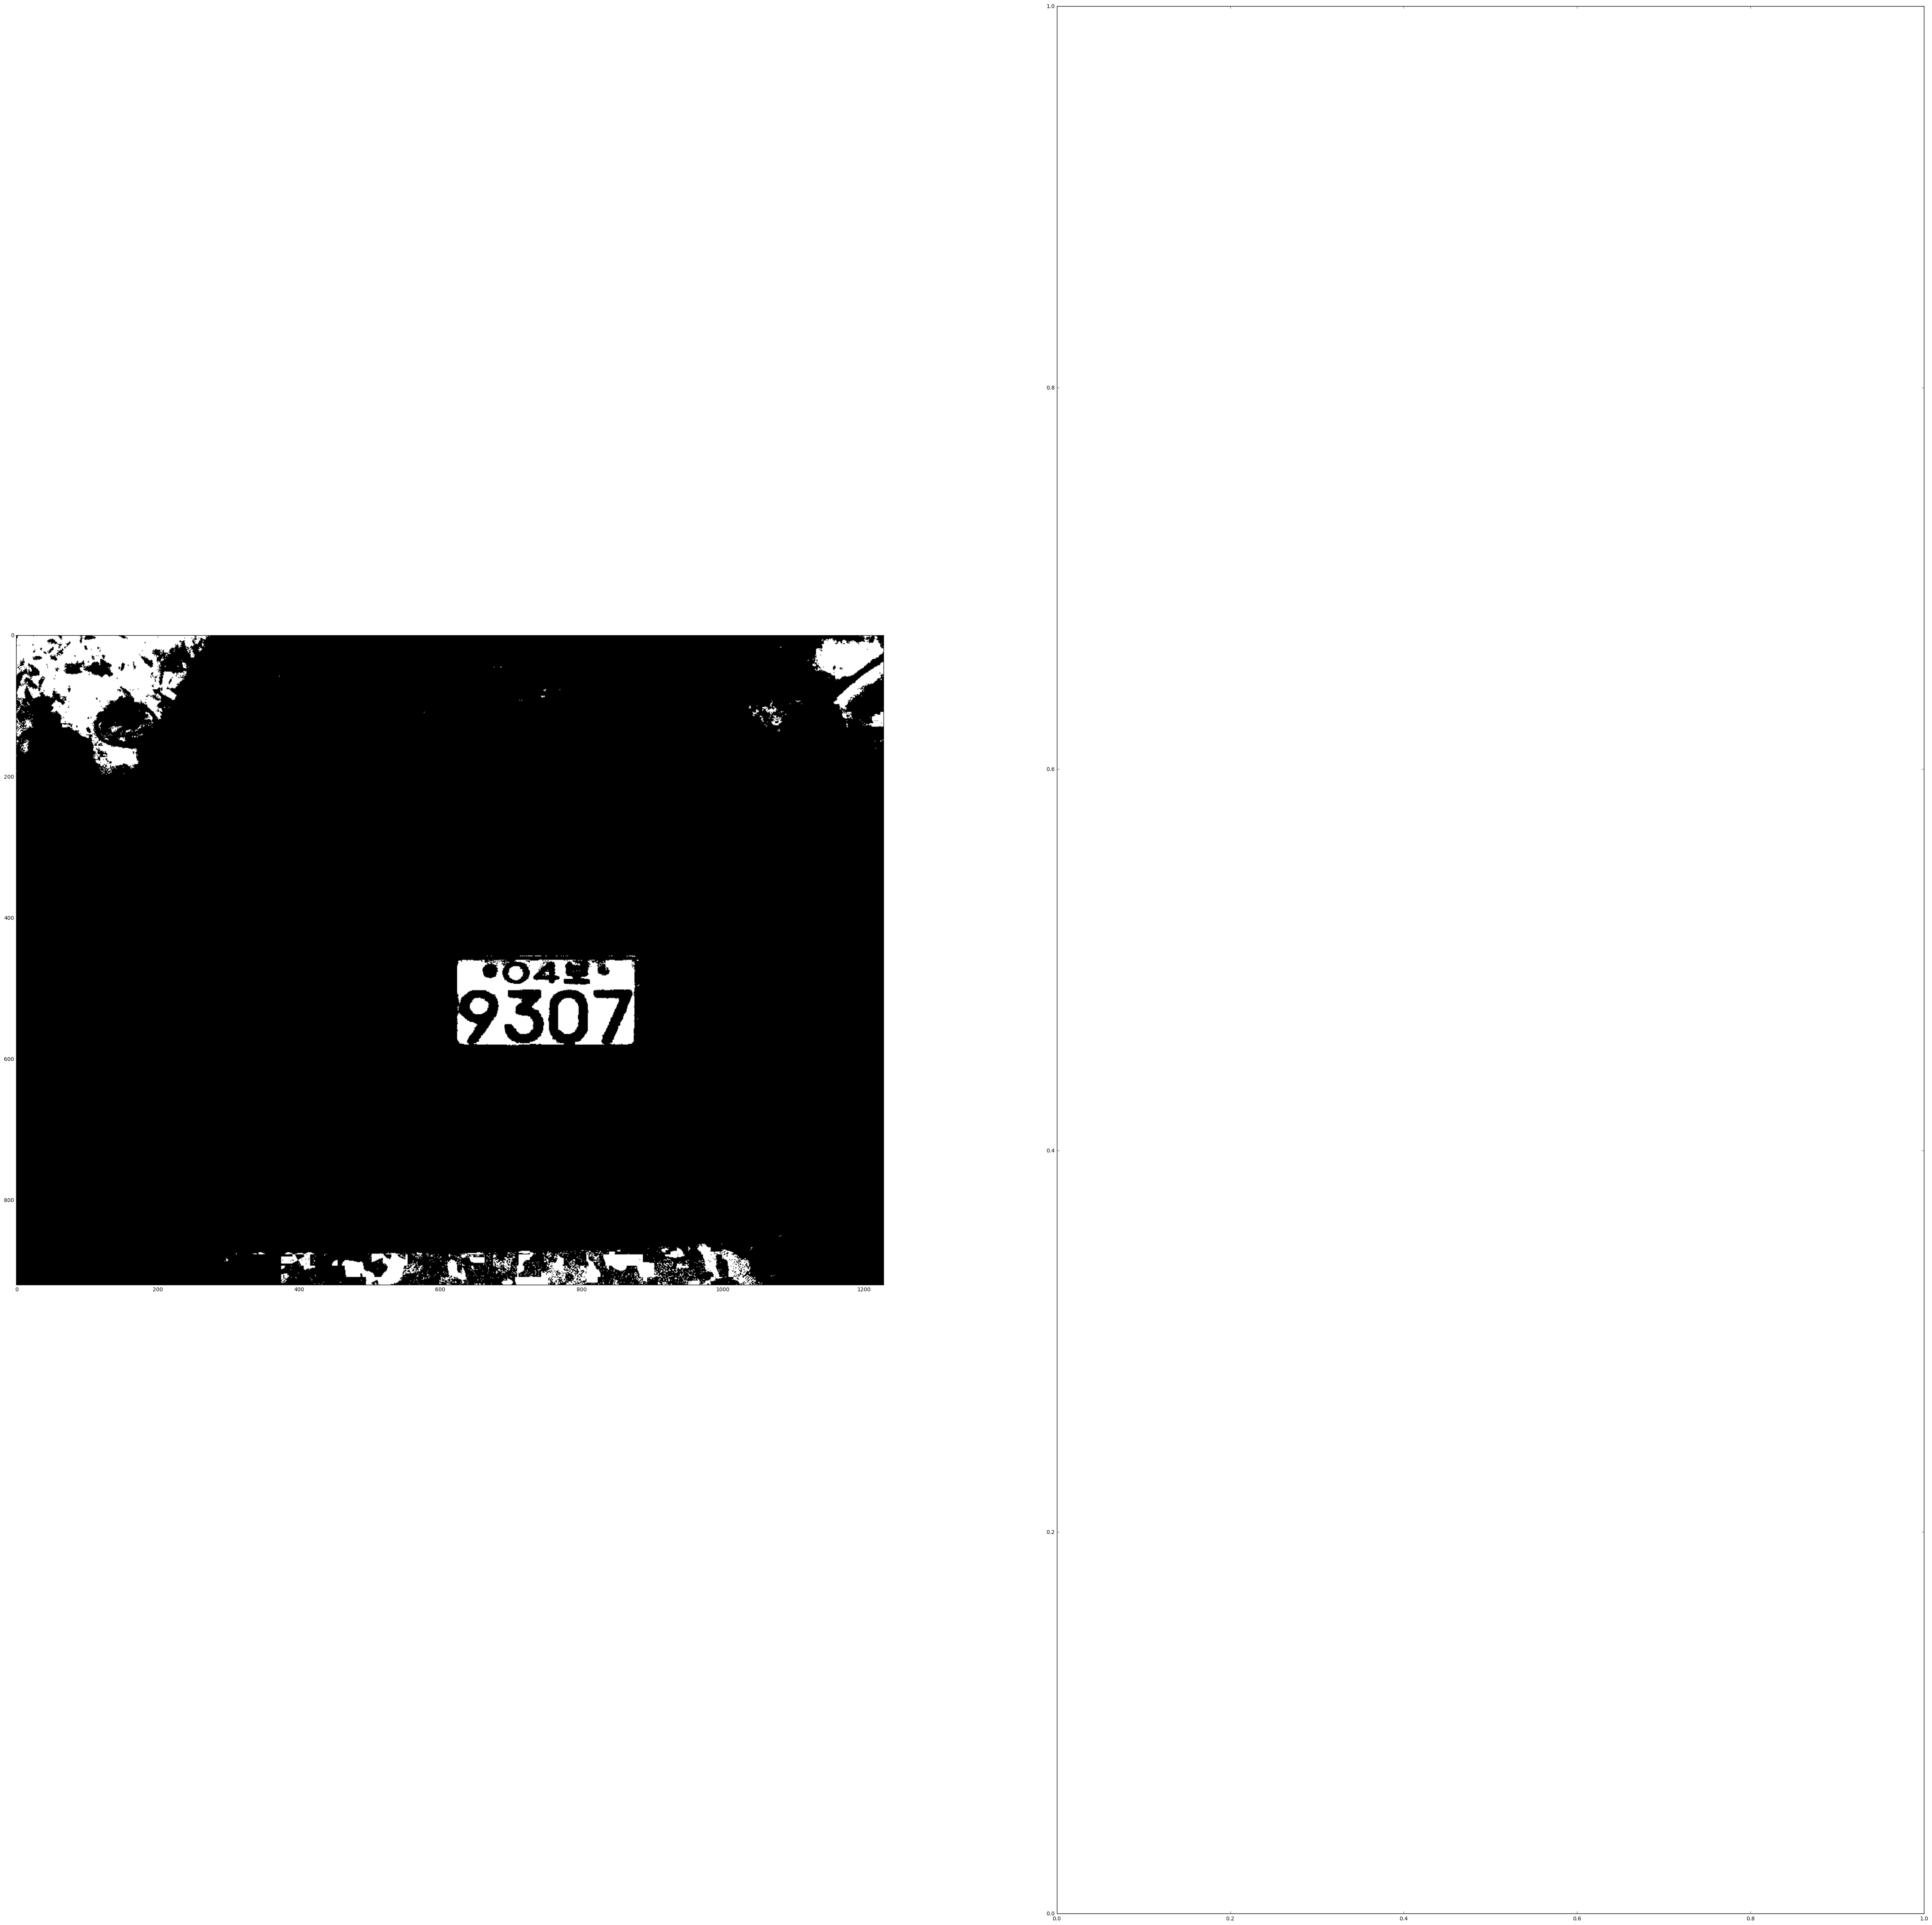

In [30]:
fig, axs = subplots(1, 2, figsize=(64, 64))
axs[0].imshow(crop1)
axs[0].axis('on')

gray()
show()

In [31]:
import tensorflow as tf
import os
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("./MNIST_DATA", one_hot=True)

learning_rate = 0.01
training_epochs = 25
batch_size = 100
display_step = 1
# tensorflow graph input
X = tf.placeholder('float', [None,784]) # mnist data image of shape 28 * 28 = 784
Y = tf.placeholder('float', [None, 10]) # 0-9 digits recognition = > 10 classes

# set model weights
W = tf.Variable(tf.random_uniform([784, 10], -1.0 , 1.0),name='W')
b = tf.Variable(tf.zeros([10]),name='b')

# Our hypothesis
activation = tf.add(tf.matmul(X, W),b)  # Softmax

# Cost function: cross entropy
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = activation, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)  # Gradient Descen

saver = tf.train.Saver()

ImportError: No module named 'tensorflow'